# Plotting example cells with adapt/integrate property

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import record_0_main as rcd_0

from disp import set_plot

FPS = 30.03
DT = 1/FPS

NNRN = 224

In [2]:
MDL = 'MA'
FNAME = 'baker_ma.npy'
smlt = rcd_0.smlt_ma

In [3]:
df_0 = pd.read_csv('data/simple/neur/baker.csv')
df_s = pd.read_csv('data/simple/neur/baker_resampled_s.csv')
df_p = pd.read_csv('data/simple/neur/baker_resampled_p.csv')

In [4]:
df_0

EXPT_ID STIM        LINE  FLY    ROI  ROI_USED      IT_0      IT_1  \
0          0    S      R70G01    0  somas     False -0.286139 -0.251529   
1          0    P      R70G01    0  somas     False -0.090690 -0.071585   
2          1    S      R70G01    1  somas     False -0.074163 -0.052967   
3          1    P      R70G01    1  somas     False -0.094280 -0.175828   
4          2    S      R70G01    2  somas     False -0.359071 -0.296972   
..       ...  ...         ...  ...    ...       ...       ...       ...   
443      221    P  vPN1_split    0  somas     False  0.308926  0.069519   
444      222    S  vPN1_split    1  somas     False  0.268154  0.517779   
445      222    P  vPN1_split    1  somas     False  0.563747  0.506288   
446      223    S  vPN1_split    2  somas     False  0.023391  0.023677   
447      223    P  vPN1_split    2  somas     False  0.064481  0.055382   

         IT_2      IT_3  ...  IT_290  IT_291  IT_292  IT_293  IT_294  IT_295  \
0   -0.214845 -0.085881  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1    0.027546 -0.089212  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2   -0.226459 -0.086673  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3   -0.132839 -0.155376  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4   -0.283760 -0.206650  ...     NaN     NaN     NaN     NaN     NaN     NaN   
..        ...       ...  ...     ...     ...     ...     ...     ...     ...   
443 -0.028961 -0.103122  ...     NaN     NaN     NaN     NaN     NaN     NaN   
444  0.526319  0.353496  ...     NaN     NaN     NaN     NaN     NaN     NaN   
445  0.271983  0.002747  ...     NaN     NaN     NaN     NaN     NaN     NaN   
446  0.009701  0.006185  ...     NaN     NaN     NaN     NaN     NaN     NaN   
447  0.086223  0.063935  ...     NaN     NaN     NaN     NaN     NaN     NaN   

     IT_296  IT_297  IT_298  IT_299  
0       NaN     NaN     NaN     NaN  
1       NaN     NaN     NaN     NaN  
2       NaN     NaN     NaN     NaN  
3       NaN     NaN     NaN     NaN  
4       NaN     NaN     NaN     NaN  
..      ...     ...     ...     ...  
443     NaN     NaN     NaN     NaN  
444     NaN     NaN     NaN     NaN  
445     NaN     NaN     NaN     NaN  
446     NaN     NaN     NaN     NaN  
447     NaN     NaN     NaN     NaN  

[448 rows x 306 columns]

In [5]:
T = np.array(df_s['T'])
I_S = np.array(df_s['S'])
I_P = np.array(df_p['P'])

R_SS = np.array(df_s[[f'R_{cnrn}' for cnrn in range(NNRN)]])
R_PS = np.array(df_p[[f'R_{cnrn}' for cnrn in range(NNRN)]])

In [6]:
path = os.path.join('data/simple/neur/', FNAME)
params = np.load(path, allow_pickle=True)[0]

r_mdl_ss = smlt(I_S, 0*I_P, params, DT)
r_mdl_ps = smlt(0*I_S, I_P, params, DT)

Fast-adapt/slow-integrate-ish ROIs

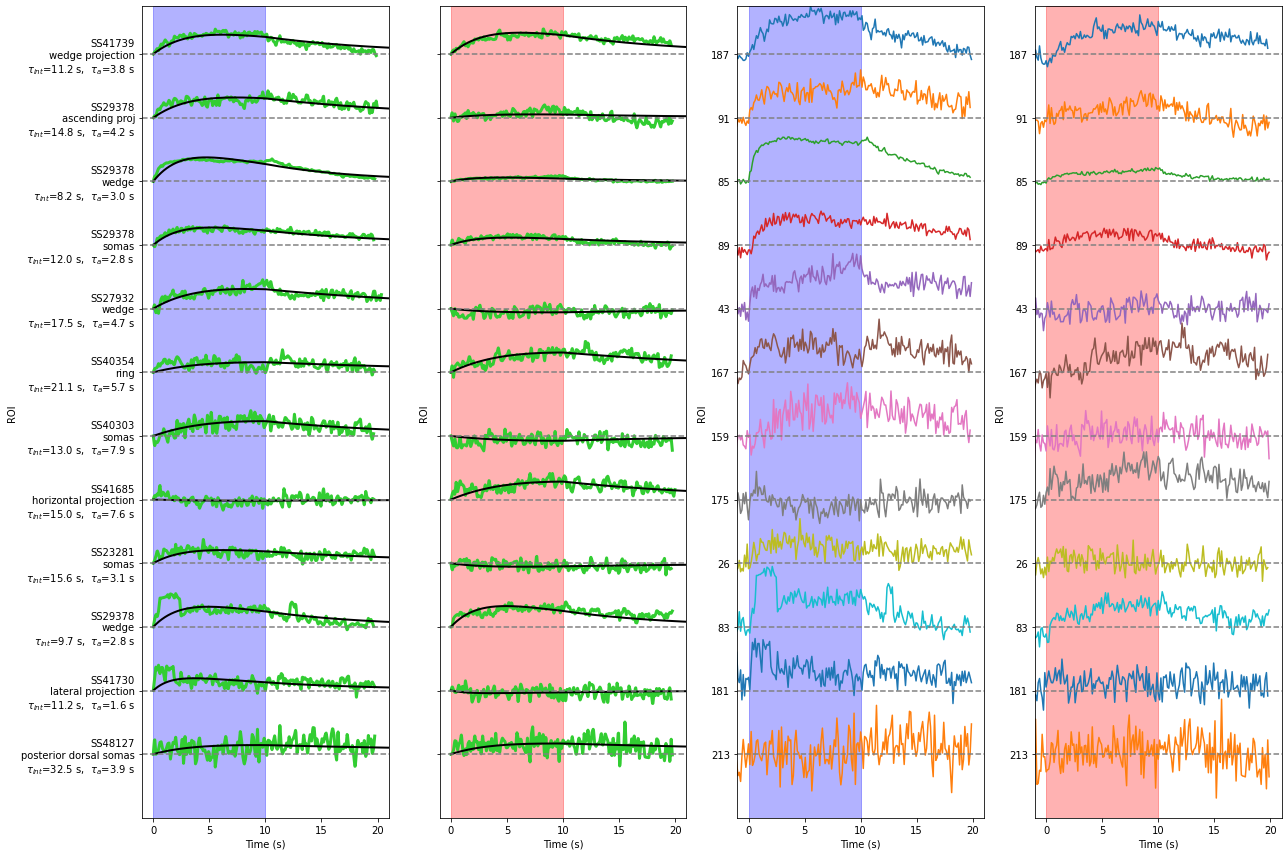

In [32]:
nrns_plot = [187, 91, 85, 89, 43, 167, 159, 175, 26, 83, 181, 213]
nplot = len(nrns_plot)

fig, axs = plt.subplots(1, 4, figsize=(18, nplot), tight_layout=True)

y_ticks = []
y_tick_labels = []

for cnrn, inrn in enumerate(nrns_plot):
    y_tick = -4*cnrn
    
    df_temp = df_0[(df_0.EXPT_ID == inrn)]
    line = df_temp['LINE'].iloc[0]
    roi = df_temp['ROI'].iloc[0]

    r_s = np.array(df_temp[df_temp.STIM == 'S'])[0][5:]
    axs[2].plot(np.arange(len(r_s))/8.5-10, r_s+y_tick)
    axs[2].axhline(y_tick, c='gray', ls='--')
    
    r_p = np.array(df_temp[df_temp.STIM == 'P'])[0][5:]
    axs[3].plot(np.arange(len(r_p))/8.5-10, r_p+y_tick)
    axs[3].axhline(y_tick, c='gray', ls='--')
    
    axs[0].plot(T, R_SS[:, inrn]/2+y_tick, c='limegreen', lw=3)
    axs[0].plot(T, r_mdl_ss[:, inrn]/2 +y_tick, color='k', lw=2)

    axs[0].axhline(y_tick, c='gray', ls='--')
        
    axs[1].plot(T, R_PS[:, inrn]/2+y_tick, c='limegreen', lw=3)
    axs[1].plot(T, r_mdl_ps[:, inrn]/2 +y_tick, color='k', lw=2)

    axs[1].axhline(y_tick, c='gray', ls='--')
    
    y_ticks.append(y_tick)
    
    tau_r = params['TAU_R'][inrn]
    tau_a = params['TAU_A'][inrn]
    y_tick_label = f'{line}\n{roi}\n' + r'$\tau_{int}$' + f'={tau_r:.1f} s,  ' + r'$\tau_a$' + f'={tau_a:.1f} s'
    y_tick_labels.append(y_tick_label)
    
axs[0].axvspan(0, 10, color='b', alpha=.3)
axs[1].axvspan(0, 10, color='r', alpha=.3)
axs[2].axvspan(0, 10, color='b', alpha=.3)
axs[3].axvspan(0, 10, color='r', alpha=.3)
    
for ax in axs:
    set_plot(ax, x_lim=(-1, 21), y_lim=(-4*nplot, 3), y_ticks=y_ticks, y_tick_labels=nrns_plot, x_label='Time (s)', y_label='ROI', font_size=10)
    
axs[1].set_yticklabels([])
    
set_plot(axs[0], y_tick_labels=y_tick_labels, font_size=10)

fig.savefig('supp/cell_types_fast_ad_slow_int.svg')

All ROIs

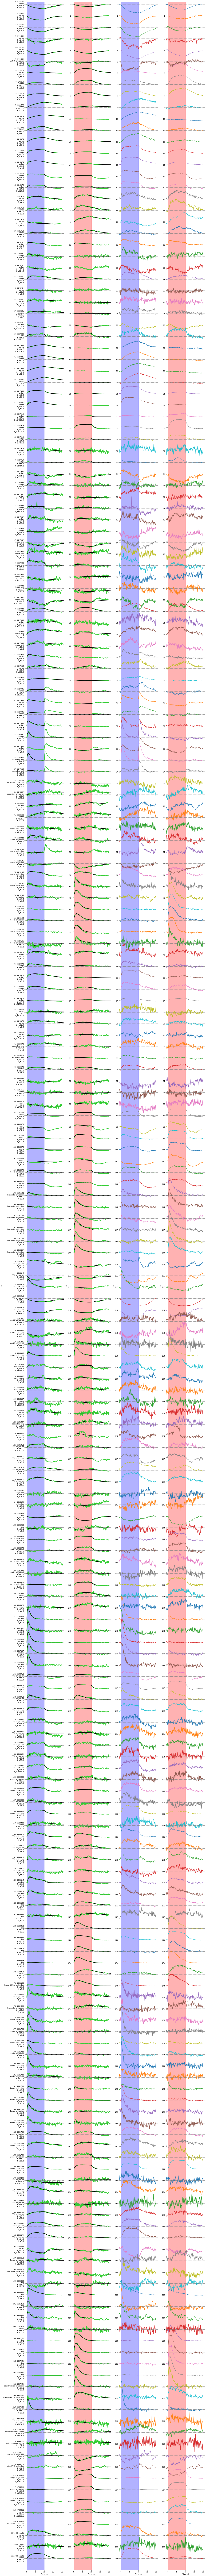

In [9]:
nrns_plot = range(NNRN)
nplot = len(nrns_plot)

fig, axs = plt.subplots(1, 4, figsize=(18, nplot), tight_layout=True)

y_ticks = []
y_tick_labels = []

for cnrn, inrn in enumerate(nrns_plot):
    y_tick = -4*cnrn
    
    df_temp = df_0[(df_0.EXPT_ID == inrn)]
    line = df_temp['LINE'].iloc[0]
    roi = df_temp['ROI'].iloc[0]

    r_s = np.array(df_temp[df_temp.STIM == 'S'])[0][5:]
    axs[2].plot(np.arange(len(r_s))/8.5-10, r_s+y_tick)
    axs[2].axhline(y_tick, c='gray', ls='--')
    
    r_p = np.array(df_temp[df_temp.STIM == 'P'])[0][5:]
    axs[3].plot(np.arange(len(r_p))/8.5-10, r_p+y_tick)
    axs[3].axhline(y_tick, c='gray', ls='--')
    
    axs[0].plot(T, R_SS[:, inrn]/2+y_tick, c='limegreen', lw=3)
    axs[0].plot(T, r_mdl_ss[:, inrn]/2 +y_tick, color='k', lw=2)

    axs[0].axhline(y_tick, c='gray', ls='--')
        
    axs[1].plot(T, R_PS[:, inrn]/2+y_tick, c='limegreen', lw=3)
    axs[1].plot(T, r_mdl_ps[:, inrn]/2 +y_tick, color='k', lw=2)

    axs[1].axhline(y_tick, c='gray', ls='--')
    
    y_ticks.append(y_tick)
    
    tau_r = params['TAU_R'][inrn]
    tau_a = params['TAU_A'][inrn]
    y_tick_label = f'{inrn}: {line}\n{roi}\nt_int {tau_r:.1f}\nt_a {tau_a:.1f}'
    y_tick_labels.append(y_tick_label)
    
axs[0].axvspan(0, 10, color='b', alpha=.3)
axs[1].axvspan(0, 10, color='r', alpha=.3)
axs[2].axvspan(0, 10, color='b', alpha=.3)
axs[3].axvspan(0, 10, color='r', alpha=.3)
    
for ax in axs:
    set_plot(ax, x_lim=(-1, 21), y_lim=(-4*nplot, 1), y_ticks=y_ticks, y_tick_labels=nrns_plot, x_label='Time (s)', y_label='ROI', font_size=10)
    
set_plot(axs[0], y_tick_labels=y_tick_labels, font_size=10)